# CV-Lab Exercise: Local Structure

## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# The config below gives neat plots, 
# remove if it is not working in your setup
%config InlineBackend.figure_format = 'svg'
from scipy.ndimage.filters import convolve
import wget
import mpl_toolkits.mplot3d.art3d as art3d

np.set_printoptions(precision=3,
                    suppress=True) # change this in case you need more precision

Hidden in this cell are some $\LaTeX$ macros
$\newcommand{\v}[1]{\mathbf #1}$
$\newcommand{\hv}[1]{\widetilde{\mathbf #1}}$
$\newcommand{\setR}{\mathbb R}$
$\newcommand{\T}{^\top}$
$\newcommand{\inv}{^{-1}}$
$\newcommand{\pfrac}[2]{\frac{\partial #1}{\partial #2}}$

## 0. Utils

In this lab we will often find the need to show images side by side for comparison. A function to do so is given here. You may skip this section and just use the function where needed.

In [2]:
def imshow_row(imttllist, axs=False):
    n = len(imttllist)
    for i, imttl in enumerate(imttllist):
        if imttl is None:
            continue
        im, ttl = imttl
        plt.subplot(1,n,i+1)
        plt.imshow(im, cmap='gray')
        if not axs:
            plt.axis('off')
        plt.title(ttl)

In [3]:
def plot_stems3d(ax, x, y, z):
    for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten()):  
        line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)), marker='o', markevery=(1, 1))
        ax.add_line(line)
    ax.set_xlim3d(X.min(), X.max())
    ax.set_ylim3d(Y.min(), Y.max())
    ax.set_zlim3d(np.minimum(G.min(), 0), np.maximum(G.max(),0))    

## 1. Analytical Derivatives

Consider the function $f$ in two variables:
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}


#### 1.1 (2pt)
Calculate the functions
\begin{align}
f_x(x,y) &= \pfrac{f(x,y)}{x}\\
f_y(x,y) &= \pfrac{f(x,y)}{y}
\end{align}
analytically, i.e. with pen on paper. These two derivatives form the **gradient vector** $\nabla f$ and is a vector starting in $(x,y)$ and pointing in the direction of maximal increase in the function value. The length is proportional to the increase. Give your derivatives in the cell below:

\begin{align}
f_x(x,y) &= VA\cos(Vx)\\
f_y(x,y) &= -BW\sin(Wy)
\end{align}

Next we are going to sample the functions $f$, $f_x$ and $f_y$ on a regular grid of 128x128 sample points with $x$ and $y$ values ranging from $-1$ to $1$. We will use a ``meshgrid`` to make two arrays ``X`` and ``Y`` where ``X`` gives the $x$ coordinate for each of the points on the regular grid and ``Y`` gives the $y$ coordinates.

In [4]:
x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)

We set the following values for the constants $A$, $B$, $V$ and $W$:
\begin{align}
A &= 1\\
B &= 2\\
V &= \frac{6\pi}{100}\\
W &= \frac{4\pi}{100}
\end{align}

In [5]:
A = 1
B = 2
V = 6 * np.pi / 100
W = 4 * np.pi / 100

#### 1.2 (2pt)

In the cell below write the code to generate the discrete images (sampled functions) ``F``, ``Fx`` and ``Fy``. Here ``F`` is the sampled version (on the grid defined by ``X`` and ``Y``) of $f$, ``Fx`` and ``Fy`` are the sampled versions of $f_x$ and $f_y$ respectively. Also plot the three images in a row (you can use the ``imshow_row`` for this).

In [6]:
def F_func(x, y):
    return A*np.sin(V*x) + B*np.cos(W*y)

def Fx_func(x):
    return V*A*np.cos(V*x)

def Fy_func(y):
    return -B*W*np.sin(W*y)

F = F_func(X, Y)
Fx = Fx_func(X)
Fy = Fy_func(Y)

In [7]:
try:
    F[0, 0]
    Fx[0, 0]
    Fy[0, 0]
except NameError as e:
    print("Did you define 2D numpy arrays F, Fx, Fy?")
    raise e

assert F.shape == Fx.shape == Fy.shape == (101, 101)

assert np.isclose(F[10, 20], 1.2058192410423678)
assert np.isclose(Fx[10, 20], 0.15249611076945777)
assert np.isclose(Fy[10, 20], -0.2390265731793245)

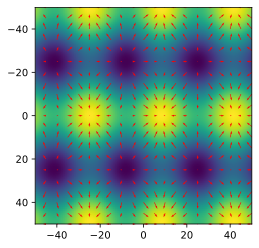

In [8]:
xx = x[::5]
yy = y[::5]
XX = X[::5, ::5]
YY = Y[::5, ::5]
FFx = Fx[::5, ::5]
FFy = Fy[::5, ::5]
plt.imshow(F, extent=(-50, 50, 50, -50), origin='upper')
plt.quiver( xx, yy, FFx, FFy, color='red', angles='xy' );

Observe that the gradient vectors plotted starting in the points of less dense grid (defined by ``XX`` and ``YY``) and if all is well should point in the direction of the maximal increase in the function value (i.e. towards the centers of the bright white spots).

## 2. Finite Difference Derivatives

We are more or less going to repeat the exercise from the previous section. This time for the function:

\begin{align}
f(x,y) = 3(1-x)^2 \exp\left(-x^2 - (y-1)^2\right)
 - 10\left(\frac{x}{5} - x^3 - y^5\right) \exp\left(-x^2 - y^2\right) 
 - \frac{1}{3} \exp\left(-(x+1)^2 - y^2\right)
 \end{align}

this is the image that in 3D rendering make up the Matlab logo (consider this a tribute to the legacy of a great program after which many array processing languages are modelled).

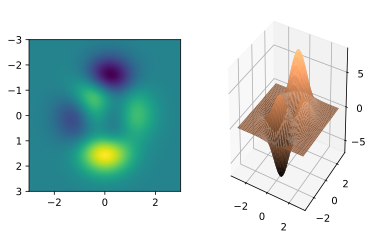

In [9]:
# %matplotlib qt  # use this in case you want an interactive 3D plot
from mpl_toolkits.mplot3d import Axes3D

xml = np.linspace(-3, 3, 150)
yml = np.linspace(-3, 3, 150)
Xml, Yml = np.meshgrid(xml, yml)
Fml = 3 * (1-Xml)**2 * np.exp(-(Xml**2) - (Yml+1)**2) \
    - 10 * (Xml/5 - Xml**3 - Yml**5) * np.exp(-Xml**2 - Yml**2) \
    - 1/3 * np.exp(-(Xml+1)**2 - Yml**2) 

fig = plt.figure(99)
ax1 = fig.add_subplot(121)
ax1.imshow(Fml, extent=(-3,3,3,-3), origin='upper');
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Xml, Yml, Fml, cmap='copper');

#### 2.1 (2pt)

Like in the previous section we could calculate the partial derivative with respect to $x$ and $y$ analytically (be my guest to do it!). In this section however you have to use the left finite difference convolution from the previous lab exercise to estimate the derivates.

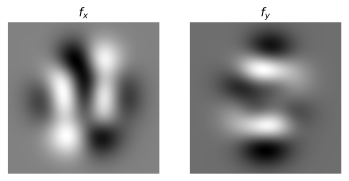

In [10]:
# below you should approximate the partial derivatives (call the variables Fxml and Fyml)
# using finite difference convolutions
import scipy.ndimage # Contains the convolve function.

Dleft = np.array([[ 0,  1, -1]])
Dup = Dleft.T

Fxml = convolve(Fml, Dleft)
Fyml = convolve(Fml, Dup)
imshow_row([(Fxml, r"$f_x$"), (Fyml, r"$f_y$")])

In [11]:
try:
    Fxml[0, 0]
    Fyml[0, 0]
except NameError as e:
    print("Did you define 2D numpy arrays Fxml, Fyml?")
    raise e

assert Fxml.shape == Fyml.shape == (150, 150)
assert np.isclose(Fxml[50, 60], -0.04245716117236498)
assert np.isclose(Fyml[50, 60], 0.29461883737214256)

The code below then should plot the gradient vectors in a sparse grid overlayed on top of the image ``Fml``.

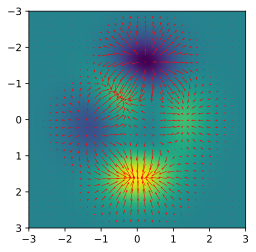

In [12]:
%matplotlib inline
xxml = xml[::5]
yyml = yml[::5]
XXml = Xml[::5, ::5]
YYml = Yml[::5, ::5]
FFxml = Fxml[::5, ::5]
FFyml = Fyml[::5, ::5]
plt.imshow(Fml, extent=(-3, 3, 3, -3), origin='upper')
plt.quiver(xxml, yyml, FFxml, FFyml, color='red', angles='xy');

## 3. Gaussian Derivatives

### Sampling of and Convolution with the Gaussian 2D Function

The 2D Gaussian function $G^s(x,y)$ is defined as:
\begin{align}
G^s(x,y) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2+y^2}{2 s^2}}
\end{align}
To do a convolution with a Gaussian kernel we have to sample this function on a discrete grid.
Note that the function never is zero! For large values of $|x|$ and $|y|$ the function quickly approaches zero fortunately so we may truncate the grid to values $-N, -N+1, \cdots, -2, -1, 0, 1, 2, \cdots, N$ for both $x$ and $y$.

#### 3.1 (4pt)

To generate the grid the ``np.meshgrid`` function can be used again. The selected value for $N$ should of course depend on the scale $s$. In your code you have to set $N$ equal to $\lceil\mathtt{factor} \times \mathtt{scale}\rceil$ where ``factor`` is a multiplication factor that influences the approximation error caused by truncating the function.

The function ``Gauss2d(scale, factor)`` should a return a tuple ``(X, Y, G)`` where ``X, Y`` are the 2D grid arrays generated with the ``np.meshgrid`` function and ``G`` is the sampled Gaussian function.

The Gauss kernel should be **normalized** in such a way that at each point in the image it calculates a weighted average of its neighbor points. 

In [13]:
import math

def Gauss2d(scale, factor):
    N = math.ceil(scale * factor)
    x = np.arange(-N, N+1)
    y = np.arange(-N, N+1)
    X, Y = np.meshgrid(x, y)
    G = (1/scale*np.sqrt(2*np.pi))*np.exp(-(X**2+Y**2)/(2*scale**2))
    G = G / np.sum(G)
    return (X,Y,G)
    

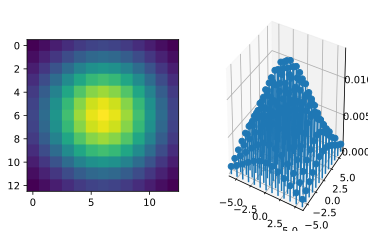

In [14]:
X, Y, G = Gauss2d(3.7, 1.4)
fig = plt.figure(99)
ax1 = fig.add_subplot(121)
ax1.imshow(G);
ax2 = fig.add_subplot(122, projection='3d')
plot_stems3d(ax2, X, Y, G)

In [15]:
X, Y, G = Gauss2d(3.7, 1.4)
assert X.shape == Y.shape == G.shape == (13, 13)
assert np.isclose(np.sum(G), 1)
assert X[1,4] == -2
assert Y[1,4] == -5
assert np.isclose(G[1,4], 0.004742521299253816)


**Questions. (2pt each)**

3.2. Explain why the width and height of the sampling grid should be proportional to the scale (sigma) of the Gaussian function.

3.3. What is an appropriate value for the proportionality argument ``factor`` when sampling the Gaussian function?

3.4. Why does the normalization of the Gaussian function result in a true local average filter?

3.2 Within a Gaussian function the sigma value decides how fast the function approaches
zero, and decides the shape of the Gaussian. This means that different values of sigma
will require a different grid to properly sample the function, a lower sigma for example
approaches zero sooner than a higher sigma value.

3.3 Any value between 1 and 2 does a good job of sampling the function until it is nearly
zero. A value smaller than this interval will stop the sampling too soon and a value that
is bigger will sample the function in an unnecessarily large grid.

3.4 Taking the average of any set of values means summing them all together and dividing
by the number of values. What happens when applying the gaussian filter is that all values
including and surrounding (by a certain scale value) the pixel the filter's origin is currently
placed on are summed together with a certain weight, determined in a way that places importance 
on proximity to the origin. These are then divided by the total sum of the weights, providing 
an average relative to a certain pixel, a 'local' average.

### Sampling the (Derivative of) the 1D Gauss Function

In the lecture notes you can learn that the Gaussian function is the only rotationally symmetric function that can is separable by dimension, i.e.
\begin{align}
G^s(x, y) = G^s(x)\,G^s(y)
\end{align}
where we have used $G^s$ to denote both the 2D function as well as the 1D Gaussian function. The context will make this clear. In this subsection only the 1D version of $G^s$ (and its derivatives) are discussed and to be implemented.

#### 3.5 (3pt)

Calculate analytically the first and second order derivative of the 1D Gaussian function. You will need them in writing the code for the ``Gauss1D`` function (and your derivatives will be tested then).

Write both derivatives in the form:
\begin{align}
\pfrac{^n G^s(x)}{x^n} = P_n(x)\, G^s(x)
\end{align}
Evidently $P_1(x)=1$ and it is your task to calculate $P_1(x)$ and $P_2(x)$. Hint: both $P_1$ and $P_2$ are polynomials in $x$. In your code you have to sample (and normalize) $G^s(x)$ and multiply that discrete version with the appropriate sampled version of $P_n(x)$.

In [16]:
# You should give DEFAULT_FACTOR a numerical value; see your answer to question 3.3.
DEFAULT_FACTOR = 1.4

def Gauss1d(scale, order=0, factor=DEFAULT_FACTOR):
    """If order=0, this function should give a normalized sample of the 1d Gaussian function, 
    similar to the Gauss2d function above. If order=1 or order=2, this function should give an 
    approximation for the first respectively second derivative by multiplying this sample by the
    appropriate analytically determined polynomial (see explanation above)."""
    N = math.ceil(scale * factor)
    X = np.arange(-N, N+1)
    G = (1/scale*np.sqrt(2*np.pi))*np.exp(-(X**2)/(2*scale**2))
    G = G / np.sum(G)
    if order == 0:
        return X, G
    elif order == 1:
        return X, (-X/scale**2)*G
    elif order == 2:
        return X, ((X**2-scale**2)/scale**4)*G

In [17]:
x0, G0 = Gauss1d(1.5, 0, 5)
x1, G1 = Gauss1d(1.5, 1, 5)
x2, G2 = Gauss1d(1.5, 2, 5)
assert x0.shape == G0.shape == (17,)
assert (x0 == x1).all() and (x1 == x2).all()
assert np.isclose(np.sum(G0), 1)
assert np.isclose(G0[4], 0.0075973240783234215)
assert np.isclose(G1[4], 0.013506353917019416)
assert np.isclose(G2[4], 0.020634707373224107)


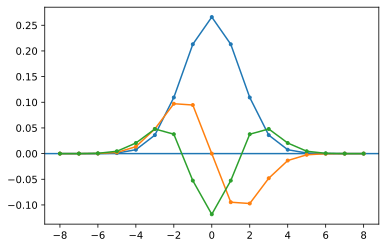

In [18]:
s = 1.5
factor = 5
x, G3 = Gauss1d(s, order=0, factor=factor)
plt.plot(x, G3, '.-')
x, G3x = Gauss1d(s, order=1, factor=factor)
x, G3xx = Gauss1d(s, order=2, factor=factor)
plt.axhline() # the x-axis
plt.plot(x, G3x, '.-');
plt.plot(x, G3xx, '.-');

### Theory questions on Gaussian derivatives

#### 3.6 (2pt)

In 1D, show that (or convince yourself that) the Gaussian has smooth derivatives of arbitrary order.

#### 3.7 (2pt)

Why does it make sense that "taking a derivative" can be seen as a type of convolution? 

#### 3.8 (2pt)

The derivatives of the convolution of an image intensity
  function with a Gaussian kernel (i.e., of a blurred image) can be calculated by convolving the
  original image with the derivative of the Gaussian, instead. 
	The result is therefore often called the *Gaussian derivative* of
  the image. 
	And the result is equivalent to the Gaussian blur of the derivative of the function. 
	But these 2 equivalences depend on two fundamental properties of the convolution:
associativity and commutativity. Show precisely how these properties are involved.

#### 3.9 (2pt)

Show that if a function $f(x,y)$ can be written as a product of functions only dependent on $x$ and $y$ respectively (so $f(x,y) = g(x) h(y)$ ), then it is separable for the convolution: $f(x,y) = g(x) \ast h(y)$.
Do this for the discrete convolution, that is a bit easier, but it holds for continuous convolution as well.

#### 3.10 (2pt)

Using the previous result, show that Gaussian convolution is separable.

3.6 (I'm not sure what a 'smooth derivative' is supposed to mean, and am assuming that the question is about
smooth functions instead and it is asking to prove that by showing it has derivatives of any order)
A function f is considered to be smooth if it has derivatives of all orders. We know that every Gaussian 
derivative in 1D can be written as the Gaussian function multiplied by some polynomial. Because of this
multiplication and the fact that each polynomial must hold some value at any point x we know that a derivative
exists for any order in 1D.

3.7 The point of a derivative function is to see how a function value changes as its independent variable
increases/decreases. This requires comparing the value of a function at a point x with its value at a 
neighboring point, (x +/- an infinitely small value in theory) and this is exactly the type of operation
that can easily be done with a convolution because you can take the value at a point x and compare it to
the value at a point x +/- 1 and output a new value based on their difference, thereby returning a type of
'derivative' which tells you something about how the function value changes going from one x to the next.

3.8 Commutativity means the ordering of operands is irrelevant when determining the result of a computation
(a + b = b + a), and associativity means the ordering of operations within larger computations is irrelevant
(a + (b + c) = (a + b) + c). The first equivalence states 
\begin{equation}
{\partial f * G} = f * {\partial G}
\end{equation}
And the second one,
\begin{equation}
{\partial f * G} = G * {\partial f}
\end{equation}

In order for the first equivalence to hold true, the ordering of operations (associativity) needs to be irrelevant, as otherwise the result wouldn't be the same. In the second equivalence the ordering of operands is changed so without commutativity this equivalence wouldn't hold true either.

3.9 We know that the function f(x,y) is a product of g(x) and h(y), meaning the value f(x,y) can be determined by multiplying the calues of g(x) and h(y). We can sample convolution kernels from these functions by convolving them with an impulse and then taking their values along the resulting function at a specified range and intervals. We know that any value f(x,y) can be determined by multiplying g(x) and h(y). This property means that the value of the convolution kernel of f(x,y) at place (i,j) can be determined by multiplying the value at places (i) and (j) in the convolution kernels of g(x) and h(y), respectively. Meaning that the kernel of f(x,y) can wholly be determined by multiplying the values of the kernels of g(x) and h(y), and so any convolution it performs can be replaced by convolving with the kernels of g(x) and h(y).

3.10 The 2D and 1D Gaussian functions respectively are : \begin{align}
G^s(x,y) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2+y^2}{2 s^2}},
G^s(x) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2}{2 s^2}},
G^s(y) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{y^2}{2 s^2}}
\end{align}
multiplying G^s(x) and G^s(y) results in G^s(x,y), so by 3.9 2D Gaussian convolution is separable by two 1D gaussian convolutions (in different directions, of course)

### Separable Gaussian (Derivative) Convolution

A convolution kernel $w(x,y)$ is called separable in case
\begin{align}
w(x,y) = h(x)\,v(y)
\end{align}
where $h$ and $v$ are two 1D functions (where $h$ stands for the horizontal function and $v$ for the vertical function). It is simple to prove that for a separable kernel:
\begin{align}
f\ast w = (f\ast_h h) \ast_v v
\end{align}
where $f \ast_h h$ is the 1D convolution of a 2D image $f$ along all its rows with kernel $h$ and $\ast_v$ is the convolution of an image along all its columns. We have seen this property before for the uniform kernel. There are many separable kernels of course but the Gaussian kernel is the unique kernel that is rotationally symmetric.

In ``scipy.ndimage`` a special function is available to do one dimensional convolutions along one of the axes of the image array: ``convolve1d``. The ``axis`` named parameter indicates along wich axis the convolution has to be done.

#### 3.11(2pt)

The Gaussian function itself is of course seperable as we have seen before. But the partial derivatives
\begin{align}
\pfrac{^m}{x^m} \pfrac{^n}{y^n} G^s(x,y)
\end{align}
are separable as well. In the cell below give the above function in a form like
\begin{align}
\pfrac{^m}{x^m} \pfrac{^n}{y^n} G^s(x,y) = \left( \cdots\mbox{some function in }x \mbox{ only}\cdots\right)
\left( \cdots\mbox{some function in }y \mbox{ only}\cdots\right)
\end{align}

\begin{align}
\pfrac{^m}{x^m} \pfrac{^n}{y^n} G^s(x,y) = \pfrac{^m}{x^m}G^s(x) *
\pfrac{^n}{y^n}G^s(y)
\end{align}

#### 3.12 (3pt)

Use the function ``Gauss1d`` and ``convolve1d`` to implement the ``gD`` function:

In [19]:
from scipy.ndimage import convolve1d

def gD(f, scales, orders, factor=DEFAULT_FACTOR, mode='nearest', cval=0):
    """ 
    f: the function to convolve
    scales: the scales in the x and y direction, respectively
    orders: the orders of the derivatives (0 <= order <= 2)
    factor: the factor with which you compute the scale to get the size of the domain.
    mode, cval: the border mode to use in the convolution, and the constant value in case the mode is `constant`.
    
    returns: the convolution of f with the appropriate Gaussian derivative.
    """
    X, GX = Gauss1d(scales[0], orders[0], factor)
    Y, GY = Gauss1d(scales[1], orders[1], factor)
    return convolve1d(convolve1d(f, GX, mode=mode, cval=cval, axis=0), GY, mode=mode, cval=cval, axis=1)

In [20]:
F = np.array([[65, 13, 15, 18, 69, 39, 38, 19, 61,  5],
       [55, 35, 12, 96, 95, 98, 80,  2, 86, 22],
       [41, 39, 91, 33, 68, 52, 18, 46, 82, 16],
       [96, 48, 57, 28, 79, 10, 84, 18, 46, 92],
       [41, 70, 32, 59, 15, 48, 58, 96, 88, 99],
       [78, 48, 26, 68, 56, 97, 79, 19, 55, 59],
       [80,  6, 54, 93, 10, 28, 10, 69, 25, 27],
       [44, 33, 25, 73, 92, 41, 15, 23, 78,  9],
       [ 3, 48,  0, 69,  6, 82, 33, 59, 22, 28],
       [66, 94, 18, 17, 13, 73, 16, 18, 25, 64]]).astype(np.float64)
F01 = gD(F, (3.5, 3.5), (0, 1), 3)
F21 = gD(F, (2.5, 2.5), (2, 1), 3)
assert F01.shape == F21.shape == (10, 10)
assert np.isclose(F01[4, 5], -0.6600031308571785)
assert np.isclose(F21[6, 3], -0.1254832128531149)


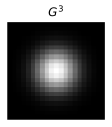

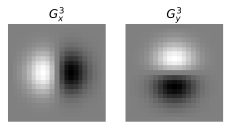

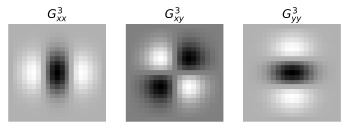

In [21]:
# Show the derivatives by convolving with an impulse.
I = np.zeros((21,21))
I[10, 10] = 1
G3 = gD(I, (3,3), (0,0), 3)
imshow_row([ (G3, r"$G^3$"), None, None])

plt.figure()
Gx3 = gD(I, (3,3), (0,1), 3)
Gy3 = gD(I, (3,3), (1,0), 3)
imshow_row([ (Gx3, r"$G^3_x$"), (Gy3, r"$G^3_y$"), None])

plt.figure()
Gxx3 = gD(I, (3,3), (0,2), 3)
Gxy3 = gD(I, (3,3), (1,1), 3)
Gyy3 = gD(I, (3,3), (2,0), 3)
imshow_row([ (Gxx3, r"$G^3_{xx}$"), 
             (Gxy3, r"$G^3_{xy}$"),
             (Gyy3, r"$G^3_{yy}$")])


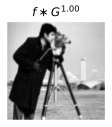

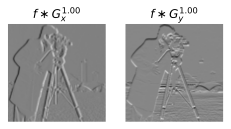

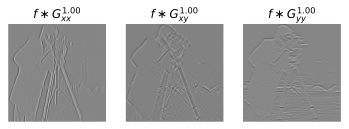

In [22]:
try:
    f = plt.imread('cameraman.png')
except FileNotFoundError:
    wget.download("https://staff.fnwi.uva.nl/r.vandenboomgaard/ComputerVision/_images/cameraman.png")
    f = plt.imread('cameraman.png')

s = 1
fs = gD(f, (s,s), (0,0), 3)
imshow_row([ (fs, r"$f\ast G^{%5.2f}$" % s), None, None])

plt.figure()
fxs = gD(f, (s,s), (0,1), 3)
fys = gD(f, (s,s), (1,0), 3)
imshow_row([(fxs, r"$f\ast G^{%5.2f}_x$" % s), 
            (fys, r"$f\ast G^{%5.2f}_y$" % s), 
            None])

plt.figure()
fxxs = gD(f, (s,s), (0,2), 3)
fxys = gD(f, (s,s), (1,1), 3)
fyys = gD(f, (s,s), (2,0), 3)
imshow_row([ (fxxs, r"$f\ast G^{%5.2f}_{xx}$" % s), 
             (fxys, r"$f\ast G^{%5.2f}_{xy}$" % s),
             (fyys, r"$f\ast G^{%5.2f}_{yy}$" % s)])


## 4. Comparing Derivatives

Remember the function
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}
and its derivatives $f_x$ and $f_y$ that you have calculated at the start of this lab exercise? Now we are going to compare the analytical results with the results calculated with Gaussian derivative convolutions.

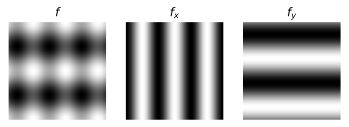

In [23]:

x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)
A = 1
B = 2
V = 6 * np.pi / 100
W = 4 * np.pi / 100

F = F_func(X, Y)
Fx = Fx_func(X)
Fy = Fy_func(Y)
imshow_row([(F, r"$f$"),
            (Fx, r"$f_x$"),
            (Fy, r"$f_y$")])
plt.gray()

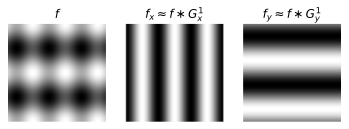

In [24]:
cFx = gD(F, (1,1), (0,1))
cFy = gD(F, (1,1), (1,0))
imshow_row([(F, r"$f$"),
            (cFx, r"$f_x\approx f \ast G^1_x$"),
            (cFy, r"$f_y\approx f \ast G^1_y$")])

Let's compare Fx with cFx by plotting the values along a horizontal line through the center of the image.

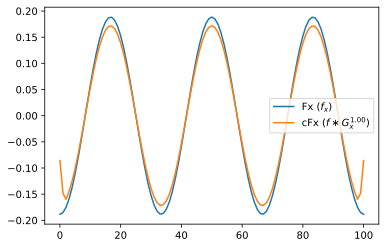

In [25]:
plt.figure()
plt.plot(Fx[Fx.shape[0]//2], label=r"Fx $(f_x)$")
plt.plot(cFx[cFx.shape[0]//2], label=r"cFx $(f \ast G^{%5.2f}_x)$" % s)
plt.legend();

**Questions.**

4.1. Comment on the cause of the differences between Fx and cFx, make a distinction between the regions in the center of the image and at the borders. (2pt)

4.2. Repeat the entire experiment using a larger value of the scale, say ``s=2``. How is difference between Fx and cFx related to the scale? (2pt)

4.3. (**For bonus points:** this exercise requires knowledge of the Fourier transform) Can you prove that disregarding border effects, cFx is proportional to Fx: cFx = C Fx, where C is only dependent on the scales? (2pt)

4.1 The difference between Fx and cFx are most obvious at the borders, and least obvious in the center. The cause of this difference is that by using the Gaussian convolution method you are smoothing the image, thereby decreasing the intensity of the highest values within an image, which means the cFx values are slightly lower (in absolute value) than the Fx values. In the center parts the derivative is close to zero so the difference is barely seen, but at the edges the derivative becomes higher and so the difference between Fx and cFx becomes more obvious.

4.2 By increasing the scale the difference between Fx and cFx also increases. This makes sense because increasing the scale means smoothing an image more, which means the property described in 4.1 is even more prevalent, as high-intensity values get smoothed down even more.

## 5. Canny Edge Detector

#### 5.1 (5pt)

Finding edges in images is often an important first step in image processing applications. Whereas in the past a lot of edge detectors have been suggested, nowadays most often the Canny edge detector is used.

An explanation of the Canny edge detector in terms of local structure as calculated with Gaussian derivatives can be found [here](https://staff.fnwi.uva.nl/r.vandenboomgaard/ComputerVision/LectureNotes/IP/LocalStructure/CannyEdgeDetector.html#canny-edge-detector)

Implement the Canny edge detector using the ``gD`` function that you have implemented in previous sections.

The result of the function ``E = canny(F, s)`` should be an image ``E`` where the value in a pixel equals the gradient norm (in that pixel) in case it is an edge pixel and zero otherwise.

To find the zero crossings in an image you can write a simple function that looks in each 3x3 neighborhood of a pixel whether there are both negative and positive values on opposite sides of the central pixel. This is not a perfect solution but it does the job quite well. The ``generic_filter`` function can be of help here.

Test your canny function on the camereman image. Show the results for several scales used in the derivatives calculations, and comment on your results and the differences..

In [26]:
from scipy.ndimage import generic_filter

def canny(F, scale):
    E = np.zeros(F.shape)
    
    Gx = gD(F, (scale, scale), (0,1))
    Gy = gD(F, (scale, scale), (1,0))
    
    Gxx = gD(F, (scale, scale), (0,2))
    Gxy = gD(F, (scale, scale), (1,1))
    Gyy = gD(F, (scale, scale), (2,0))
    
    Fw = np.sqrt(Gx*2+Gy*2)
    Fww = (Gx*2)*Gxx + 2*Gx*Gy*Gxy + (Gy*2)*Gyy
    
    return Fw * generic_filter(Fww, zero_cross, size=(3,3))
    
def zero_cross(arr):
    arr = arr.reshape((3,3))
    I = 1
    Y = [arr[0,1], arr[2, 1]]
    X = [arr[1,0], arr[1, 2]]
    Diag1 = [arr[0,0], arr[2, 2]]
    Diag2 = [arr[0,2], arr[2, I-1]]
    for x, y in [Y, X, Diag1, Diag2]:
        if x > 0 and y < 0:
            return 1
        elif x < 0 and y > 0:
            return 1
    return 0

/home/ivan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


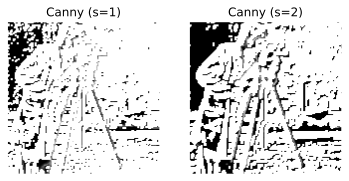

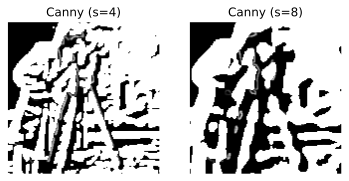

In [27]:
F = plt.imread('cameraman.png')
zc1 = canny(F, 1)
zc2 = canny(F, 2)
zc4 = canny(F, 4)
zc8 = canny(F, 8)

imshow_row([(zc1, "Canny (s=1)"),
            (zc2, "Canny (s=2)")])
plt.figure()
imshow_row([(zc4, "Canny (s=4)"),
            (zc8, "Canny (s=8)")])

In [28]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 